## Army all over the world


### members names:  
May Ashkenazi

Barak Wizberger

Eden Jorno

Yuval Fainberg


### Data source: 
https://www.kaggle.com/datasets/prasertk/military-power-by-country-2022

In [310]:
url= 'https://github.com/mayas9/my-project/raw/main/global%20firepower%202022%20wide.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from IPython.core.display import Image

In [8]:
Image(url= 'https://raw.githubusercontent.com/mayas9/my-project/main/army%20pic.jpg', width= 800 , height= 600)


In [4]:
Image(url= 'https://raw.githubusercontent.com/mayas9/my-project/main/%D7%A9%D7%A8%D7%99%D7%95%D7%9F3.jpg', width= 800 , height= 600)

In [5]:
army= pd.read_csv(url)

NameError: name 'url' is not defined

In [315]:
army.head()

,country,country_code,Active Personnel,Aircraft Carriers,Armored Vehicles,Attack Helicopters,Available Manpower,Coastline Coverage,Corvettes,Dedicated Attack,...,Square Land Area,Submarines,Tanker Fleet,Tanks,Total Aircraft Strength,Total Population,Towed Artillery,Trainers,Transports,Waterways (usable)
0,Afghanistan,AFG,0,0,530,0,14611901,0,0,0,...,652230,0,0,0,0,37466414,60,0,0,1200
1,Albania,ALB,8000,0,76,0,1513309,362,0,0,...,28748,0,0,0,19,3088385,0,0,0,41
2,Algeria,ALG,130000,0,6461,45,20916812,998,6,22,...,2381741,6,5,2196,552,43576691,450,87,58,0
3,Angola,ANG,107000,0,1210,15,6728529,1600,0,18,...,1246700,0,0,320,299,33642646,585,61,30,1300
4,Argentina,ARG,83000,0,800,0,20180574,4989,9,6,...,2780400,2,2,349,218,45864941,172,70,22,11000


In [316]:
army.columns = army.columns.str.replace(' ','_')

In [317]:
army.head()

,country,country_code,Active_Personnel,Aircraft_Carriers,Armored_Vehicles,Attack_Helicopters,Available_Manpower,Coastline_Coverage,Corvettes,Dedicated_Attack,...,Square_Land_Area,Submarines,Tanker_Fleet,Tanks,Total_Aircraft_Strength,Total_Population,Towed_Artillery,Trainers,Transports,Waterways_(usable)
0,Afghanistan,AFG,0,0,530,0,14611901,0,0,0,...,652230,0,0,0,0,37466414,60,0,0,1200
1,Albania,ALB,8000,0,76,0,1513309,362,0,0,...,28748,0,0,0,19,3088385,0,0,0,41
2,Algeria,ALG,130000,0,6461,45,20916812,998,6,22,...,2381741,6,5,2196,552,43576691,450,87,58,0
3,Angola,ANG,107000,0,1210,15,6728529,1600,0,18,...,1246700,0,0,320,299,33642646,585,61,30,1300
4,Argentina,ARG,83000,0,800,0,20180574,4989,9,6,...,2780400,2,2,349,218,45864941,172,70,22,11000


In [318]:
max_def_budget=army[['country','Defense_Budget']].nlargest(10, 'Defense_Budget')

In [319]:
army.rename(columns= {'Purchasing_Power_Parity' : 'country_budget'} , inplace = True)
army['perc_def_budget']= army['Defense_Budget']/army['country_budget']*100
max_prec= army.nlargest(10, 'perc_def_budget')
min_prec= army.nsmallest(10, 'perc_def_budget')

### :ניתן לראות את רשימת 10 המדינות עם השקעת האחוז הגבוהביותר של תקציב ביטחון מתוך תקציב המדינה  

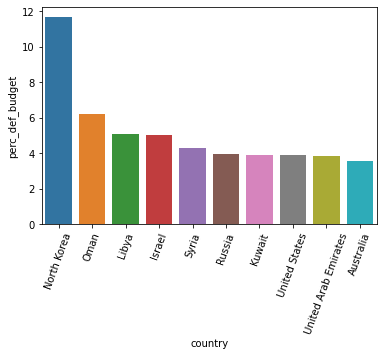

In [320]:
sns.barplot(data= max_prec, y= 'perc_def_budget', x= 'country') 
plt.xticks(rotation=70);


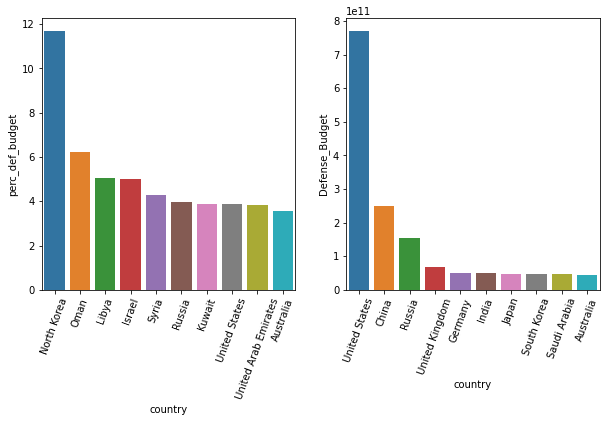

In [360]:
fig, axes = plt.subplots(figsize=(10, 5), ncols=2)
sns.barplot(ax= axes[0], data= max_prec, y= 'perc_def_budget', x= 'country')
sns.barplot(ax= axes[1],data= max_def_budget, y= 'Defense_Budget', x= 'country') 
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=70);
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=70);


## ניתן לראות שהמדינות: ארה"ב, אוסטרליה ורוסיה מופיעות בשני הגרפים

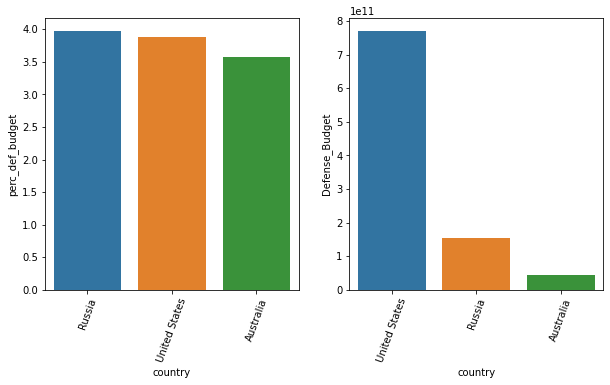

In [368]:
max_countries=max_prec[(max_prec['country']== 'United States')|(max_prec['country']== 'Russia')|(max_prec['country']== 'Australia')]
max_countries2=max_def_budget[(max_def_budget['country']== 'United States')|(max_def_budget['country']== 'Russia')|(max_def_budget['country']== 'Australia')] 
fig, axes = plt.subplots(figsize=(10, 5), ncols=2)
sns.barplot(ax= axes[0], data= max_countries, y= 'perc_def_budget', x= 'country')
sns.barplot(ax= axes[1],data=max_countries2 , y= 'Defense_Budget', x= 'country') 
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=70);
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=70);


##### :קורלציה על עמודות נבחרות מהדאטה, בשילוב עמודת היחס בין תקציב הבטחון לבין תקציב המדינה שהוספנו קודם

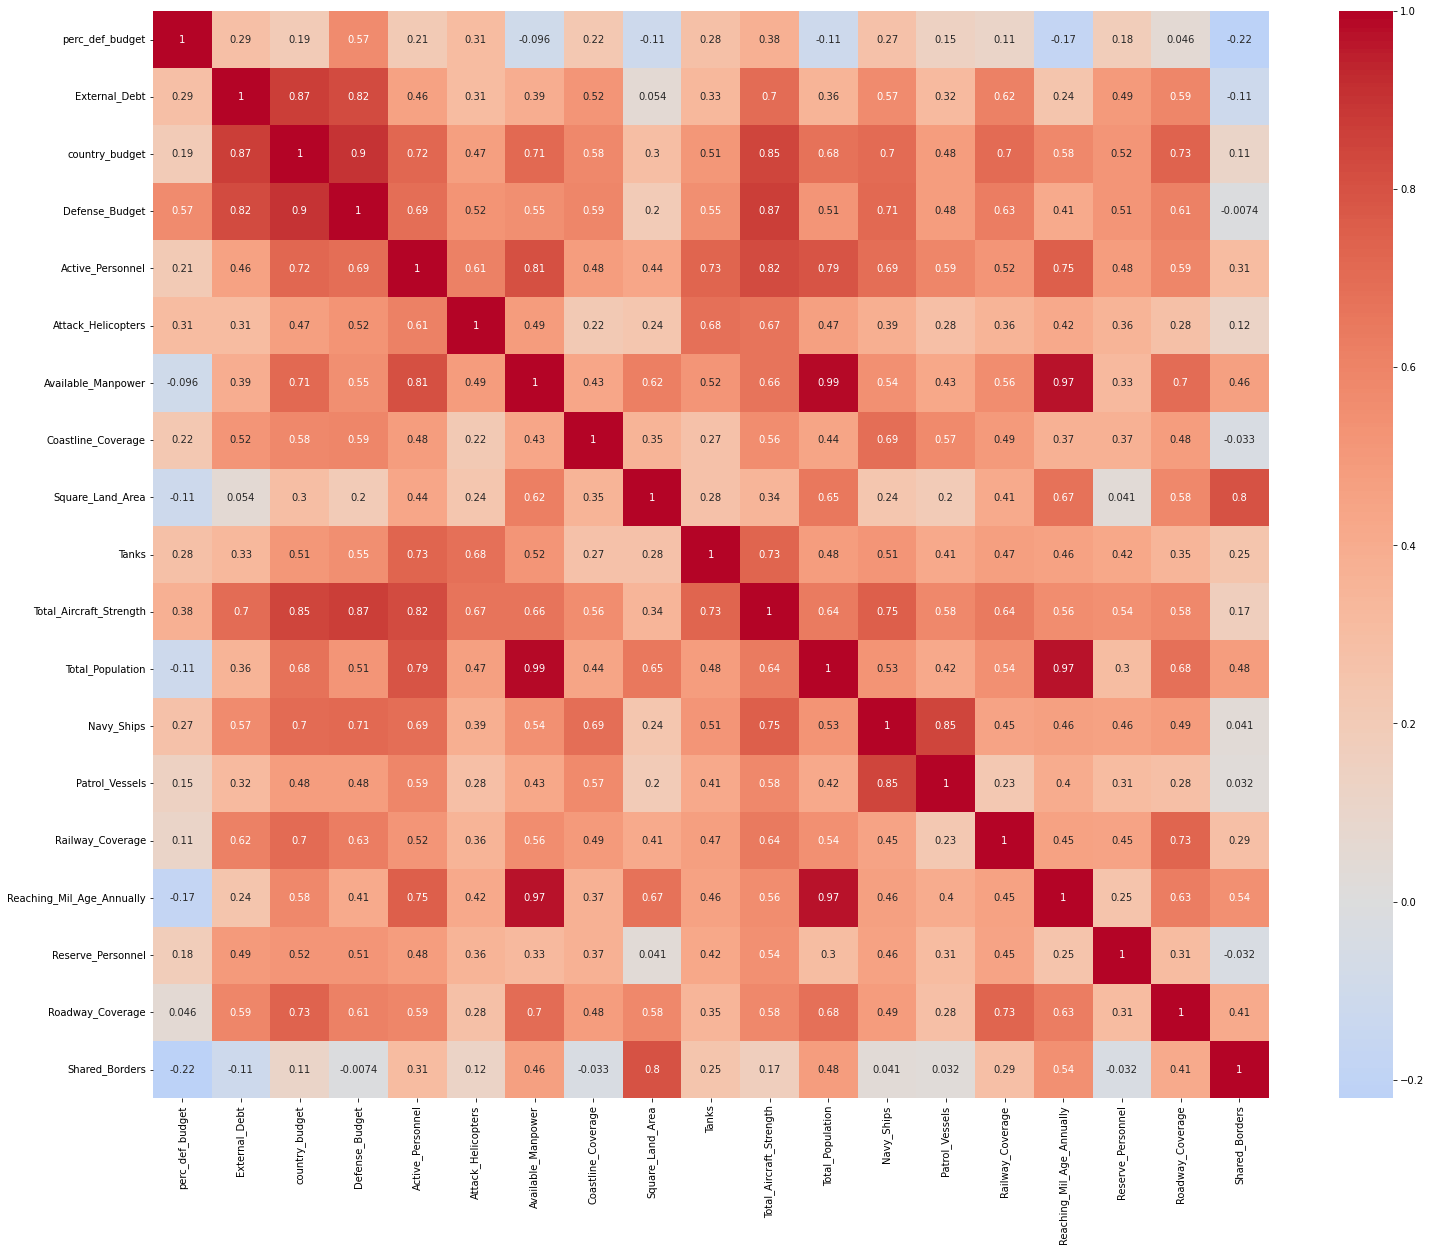

In [369]:
features= ['perc_def_budget','External_Debt','country_budget','Defense_Budget','Active_Personnel','Attack_Helicopters','Available_Manpower','Coastline_Coverage','Square_Land_Area','Tanks','Total_Aircraft_Strength' ,'Total_Population','Navy_Ships','Patrol_Vessels','Railway_Coverage','Reaching_Mil_Age_Annually','Reserve_Personnel','Roadway_Coverage','Shared_Borders']
corrs = army[features].corr(method = 'spearman')

plt.figure(figsize=(25,20))  #figure size
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

#### ניתן לראות מהשורה הראשונה כי ישנה קורלציה של 0.38 בין אחוז השקעה בתקציב הבטחון לבין השקעה בכח אווירי 

In [370]:
Image(url= 'https://raw.githubusercontent.com/mayas9/army-project/main/airplain11.jpg', width= 800 , height= 600)

<AxesSubplot:xlabel='perc_def_budget', ylabel='Total_Aircraft_Strength'>

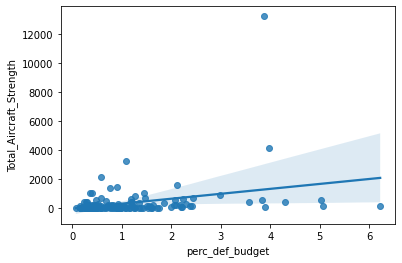

In [371]:
sns.regplot(data= army[(army['perc_def_budget']<10)] , x= 'perc_def_budget', y= 'Total_Aircraft_Strength')

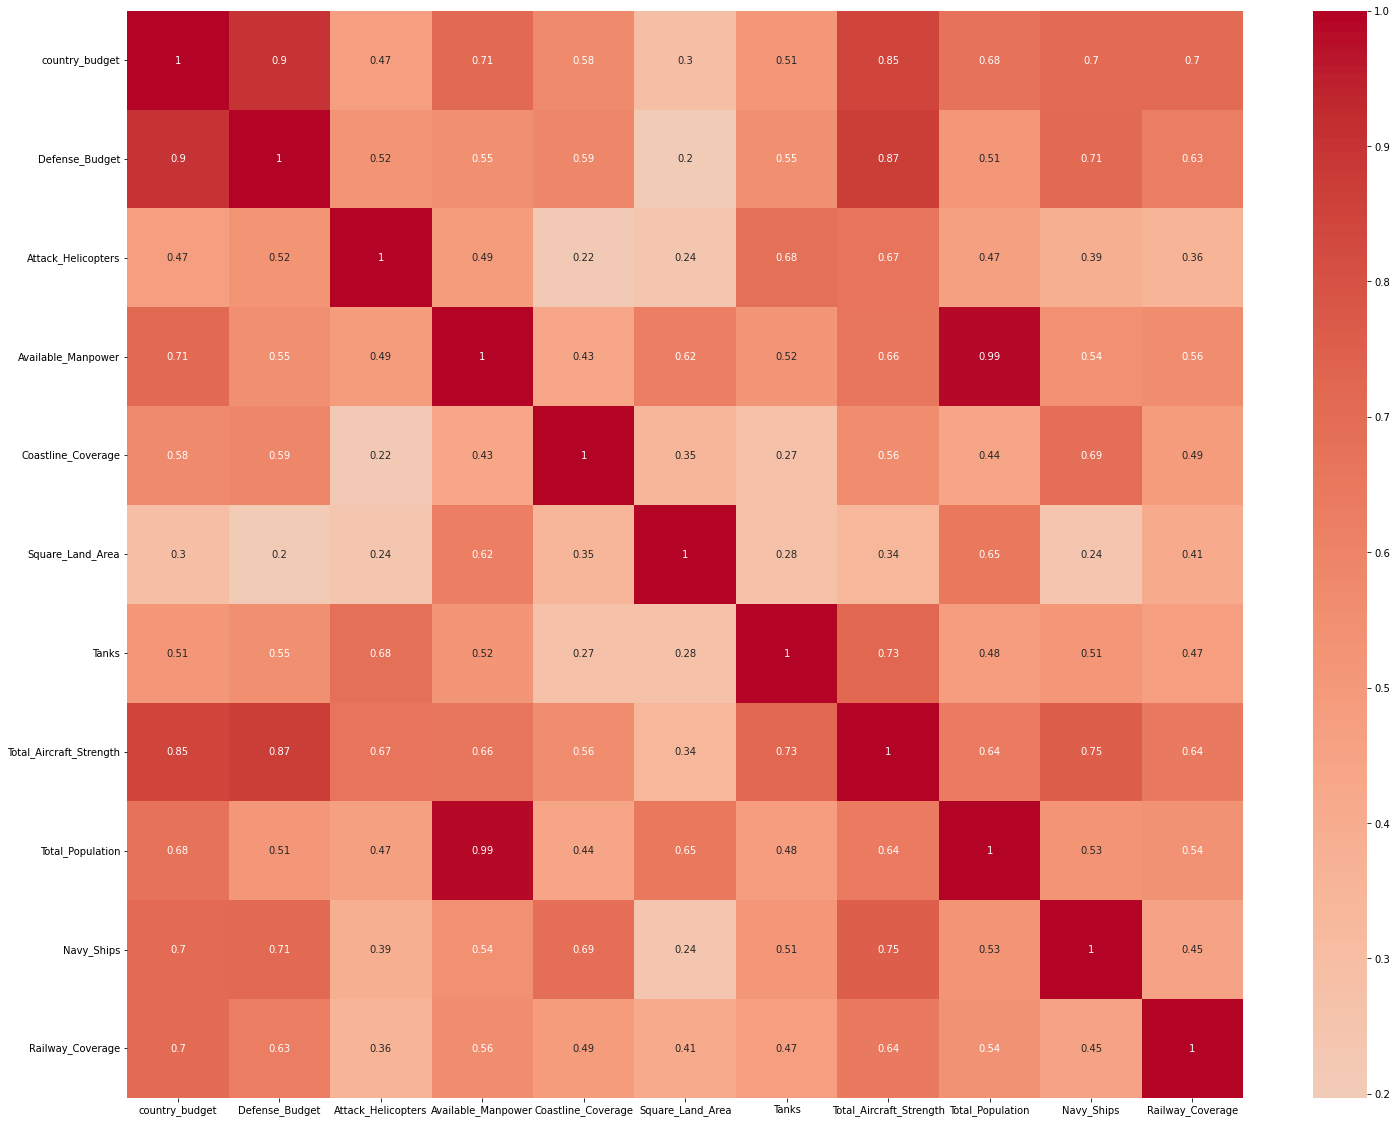

In [372]:
features= ['country_budget','Defense_Budget','Attack_Helicopters','Available_Manpower','Coastline_Coverage','Square_Land_Area','Tanks','Total_Aircraft_Strength' ,'Total_Population','Navy_Ships','Railway_Coverage']
corrs = army[features].corr(method = 'spearman')

plt.figure(figsize=(25,20))  #figure size
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

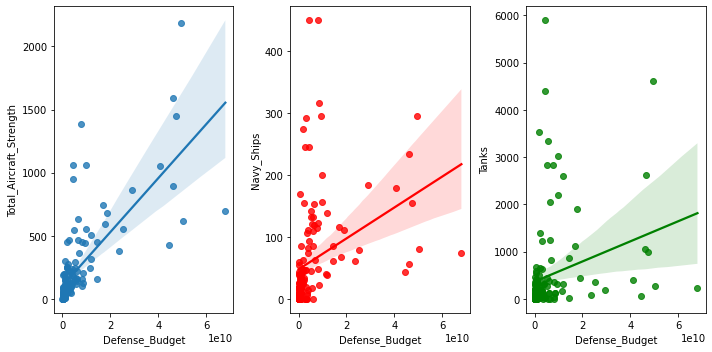

In [373]:
fig, axes = plt.subplots(figsize=(10, 5), ncols=3)
sns.regplot(data= army[army['Defense_Budget']<100000000000] , x= 'Defense_Budget', y= 'Total_Aircraft_Strength',ax= axes[0])
sns.regplot(data= army[army['Defense_Budget']<100000000000] , x= 'Defense_Budget', y= 'Navy_Ships',ax= axes[1], color= 'r')
sns.regplot(data= army[army['Defense_Budget']<100000000000] , x= 'Defense_Budget', y= 'Tanks', ax= axes[2],color='g')
plt.tight_layout()

In [374]:
Image(url= 'https://raw.githubusercontent.com/mayas9/army-project/main/russia%20ukraine%20picture.jpeg', width= 700 , height= 600)

In [379]:
army['perc_active_available']= army['Active_Personnel']/army['Available_Manpower']*100
army['perc_aircraft_area']= army['Total_Aircraft_Strength']/army['Square_Land_Area']*100

In [382]:
war= army[(army['country']== 'Russia') | (army['country']== 'Ukraine')|(army['country']== 'Israel')] 

יצרנו עמודות של יחס בין כמות חיילים פעילים לבין כמות אנשים שכשירים לשרת בצבא
בנוסף עמודה של יחס בין כח אווירי ביחס לגודל המדינה

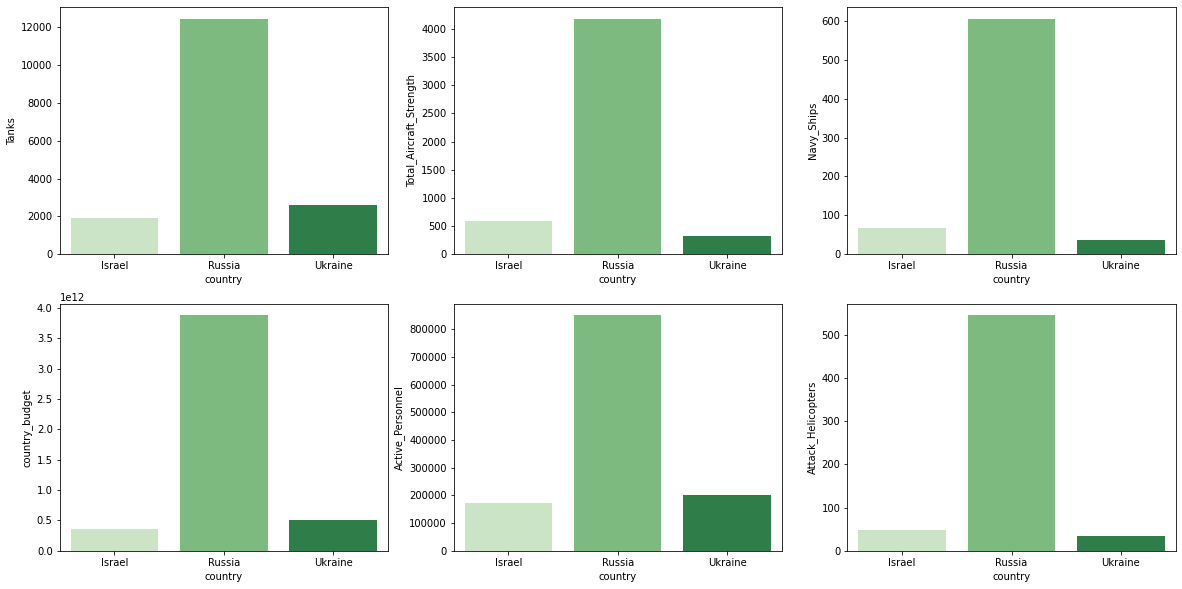

In [383]:
fig,axes= plt.subplots(figsize= (20,10),nrows=2 , ncols= 3 )
sns.barplot(ax= axes[0,0], x= 'country' ,y='Tanks', data= war,palette= 'Greens'); 
sns.barplot(ax= axes[0,1], x= 'country' ,y='Total_Aircraft_Strength', data= war,palette= 'Greens');
sns.barplot(ax= axes[0,2], x= 'country' ,y= 'Navy_Ships', data= war,palette= 'Greens');
sns.barplot(ax= axes[1,0], x= 'country' ,y='country_budget', data= war,palette= 'Greens');
sns.barplot(ax= axes[1,1], x= 'country' ,y= 'Active_Personnel', data= war,palette= 'Greens');
sns.barplot(ax= axes[1,2], x= 'country' ,y= 'Attack_Helicopters', data= war,palette= 'Greens');


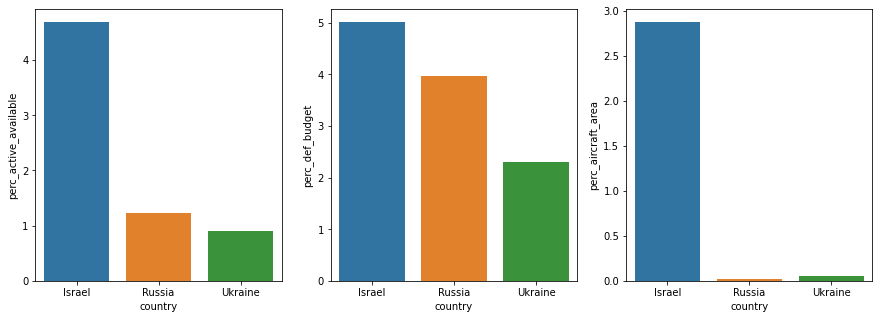

In [384]:
fig,axes= plt.subplots(figsize= (15,5) , ncols= 3 )
sns.barplot(ax= axes[0], x= 'country' ,y='perc_active_available', data= war); 
sns.barplot(ax= axes[1], x= 'country' ,y='perc_def_budget', data= war);
sns.barplot(ax= axes[2], x= 'country' ,y= 'perc_aircraft_area', data= war);



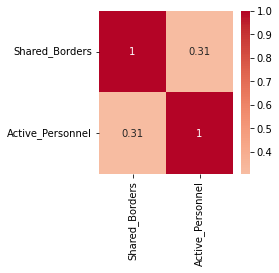

In [397]:
borders_cor=army.loc[:,['Shared_Borders' , 'Active_Personnel']].corr(method= 'spearman')
plt.figure(figsize=(3,3))  #figure size
sns.heatmap(borders_cor, cmap='coolwarm', center=0, annot = True);

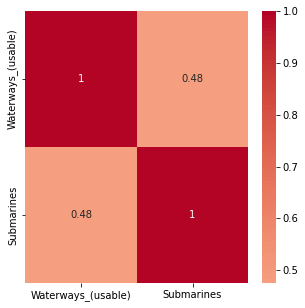

In [396]:
water_cor=army.loc[:,[ 'Waterways_(usable)', 'Submarines']].corr(method= 'spearman')
plt.figure(figsize=(5,5))  #figure size
sns.heatmap(water_cor, cmap='coolwarm', center=0, annot = True);

<AxesSubplot:xlabel='Waterways_(usable)', ylabel='Submarines'>

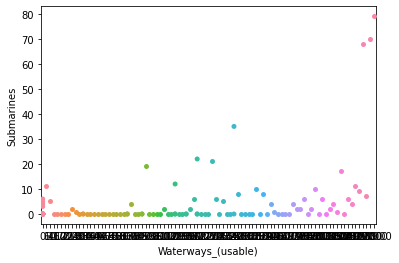

In [403]:
sns.stripplot(x='Waterways_(usable)', y='Submarines', data=army,jitter=0.001)